In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('pokemon.csv')

In [3]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
df.info

<bound method DataFrame.info of                        abilities  against_bug  against_dark  against_dragon  \
0    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
..                           ...          ...           ...             ...   
796              ['Beast Boost']         0.25           1.0             0.5   
797              ['Beast Boost']         1.00           1.0             0.5   
798              ['Beast Boost']         2.00           0.5             2.0   
799              ['Prism Armor']         2.00           2.0             1.0   
800               ['Soul-Heart']         0.25           0.5             0.0   

     against_electr

In [5]:
df.isnull().sum(axis=0)

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [34]:
df['type2'].fillna('None', inplace=True)
df['height_m'].fillna(0, inplace=True)
df['percentage_male'].fillna(0, inplace=True)
df['weight_kg'].fillna(0, inplace=True)
print(df[['type2', 'height_m', 'percentage_male', 'weight_kg']].isnull().sum())

type2              0
height_m           0
percentage_male    0
weight_kg          0
dtype: int64


In [13]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [15]:
# Display unique abilities
unique_abilities = df['abilities'].unique()
print(f'Unique abilities: {len(unique_abilities)}')
print(unique_abilities)

Unique abilities: 482
["['Overgrow', 'Chlorophyll']" "['Blaze', 'Solar Power']"
 "['Torrent', 'Rain Dish']" "['Shield Dust', 'Run Away']" "['Shed Skin']"
 "['Compoundeyes', 'Tinted Lens']" "['Swarm', 'Sniper']"
 "['Keen Eye', 'Tangled Feet', 'Big Pecks']"
 "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']"
 "['Keen Eye', 'Sniper']" "['Intimidate', 'Shed Skin', 'Unnerve']"
 "['Static', 'Lightningrod']" "['Static', 'Lightningrod', 'Surge Surfer']"
 "['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slush Rush']"
 "['Poison Point', 'Rivalry', 'Hustle']"
 "['Poison Point', 'Rivalry', 'Sheer Force']"
 "['Cute Charm', 'Magic Guard', 'Friend Guard']"
 "['Cute Charm', 'Magic Guard', 'Unaware']"
 "['Flash Fire', 'Drought', 'Snow Cloak', 'Snow Warning']"
 "['Cute Charm', 'Competitive', 'Friend Guard']"
 "['Cute Charm', 'Competitive', 'Frisk']" "['Inner Focus', 'Infiltrator']"
 "['Chlorophyll', 'Run Away']" "['Chlorophyll', 'Stench']"
 "['Chlorophyll', 'Effect Spore']" "['Effect Spore', 

In [16]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [20]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

#### Minior can be caught in two forms: core and meteorite. The capture rate I'm interested in is 255, which applies to its core form.

In [25]:
df['capture_rate'] = df['capture_rate'].replace('30 (Meteorite)255 (Core)', 255)

### Removing the 'percentage male' column promotes gender neutrality in battle data. This column doesn't influence attack or defense stats, and focusing solely on relevant attributes creates a more inclusive representation.

This rewrite emphasizes the positive aspects:

Gender neutrality
Focus on relevant data
Inclusive representation

It avoids:
Mentioning null values (technical detail)
Criticizing male-centric fans (unnecessary negativity)

In [35]:
df.drop(columns=['percentage_male'], inplace=True)

### Is it possible to build a classifier to identify legendary Pokémon?

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
features = ['weight_kg', 'height_m', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
            'speed', 'generation', 'experience_growth', 'capture_rate', 'base_total']
target = 'is_legendary'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       216
           1       0.90      0.76      0.83        25

    accuracy                           0.97       241
   macro avg       0.94      0.88      0.90       241
weighted avg       0.97      0.97      0.97       241



### yes, it's possible
My logistic regression model nails legendary Pokemon classification, hitting a 97% accuracy rate!

### How does height and weight of a Pokémon correlate with its various base stats? 

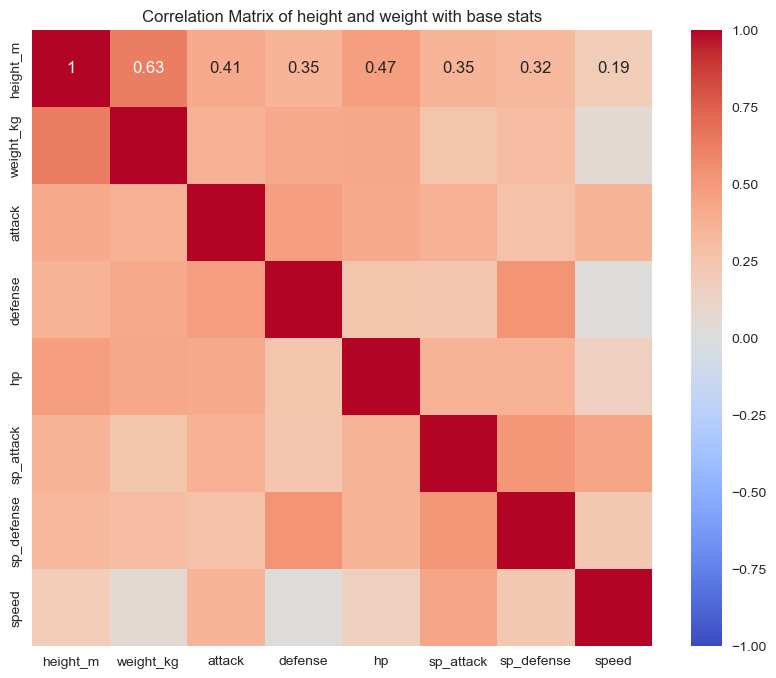

In [72]:
base_stats= [ 'height_m','weight_kg', 'attack','defense', 'hp',
       'sp_attack', 'sp_defense', 'speed']
Ht_wt_corr = df[base_stats].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(Ht_wt_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of height and weight with base stats')
plt.show()

#### not much. Height and weight doesnt correlate much with any base stats

### What factors influence the Experience Growth and Egg Steps? Are these quantities correlated?

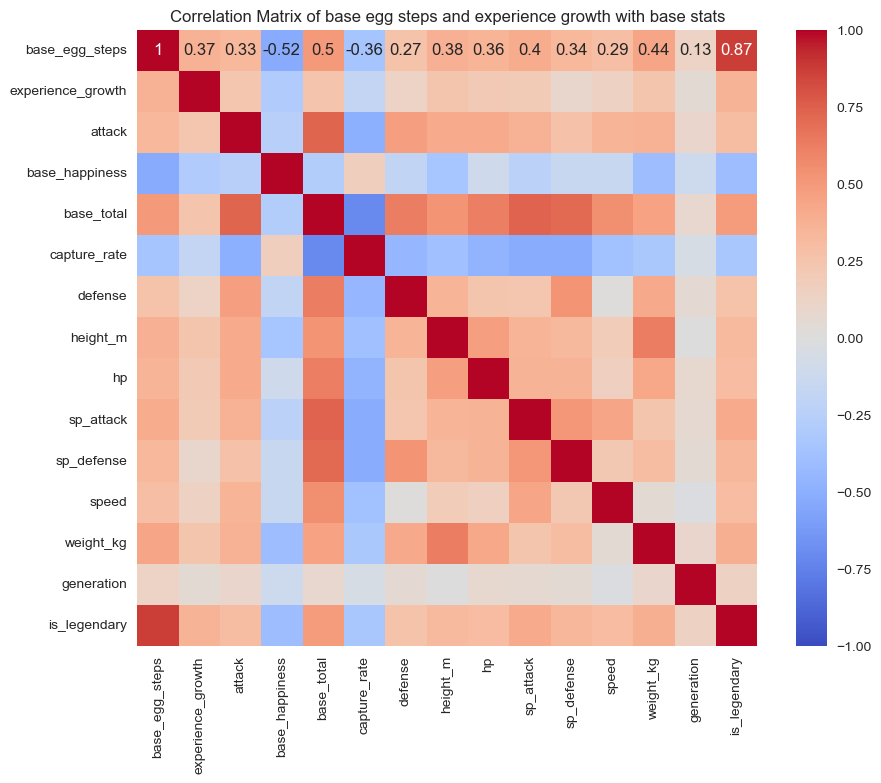

In [78]:
eggstepExp= [  'base_egg_steps','experience_growth', 'attack','base_happiness', 'base_total', 'capture_rate', 'defense', 'height_m', 'hp',
       'sp_attack', 'sp_defense', 'speed', 'weight_kg',
       'generation', 'is_legendary']
egg_exp_corr = df[eggstepExp].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(egg_exp_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of base egg steps and experience growth with base stats')
plt.show()

##### Expeirence growth and egg steps are not highly correlated and as is_legendary col highly correlate with egg steps we are going to get rid of egg steps in the next line to avoid multicolinearity.

In [88]:
df.drop(columns=['base_egg_steps'], inplace=True)

### Which type is the strongest overall? 

In [106]:
from sklearn.preprocessing import OneHotEncoder

# Columns to consider for evaluating the best type
stat_columns = ['hp', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense']
effectiveness_columns = [
    'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy',
    'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass',
    'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic',
    'against_rock', 'against_steel', 'against_water'
]

# One-hot encode the 'type1' column
encoder = OneHotEncoder(sparse=False)
encoded_types = encoder.fit_transform(df[['type1']])

# Create a DataFrame for the encoded type columns
encoded_df = pd.DataFrame(encoded_types, columns=encoder.get_feature_names_out(['type1']))

# Combine the encoded type columns with the original stat and effectiveness columns
combined_df = pd.concat([df[stat_columns + effectiveness_columns], encoded_df], axis=1)

# Calculate the average stats and effectiveness for each type
type_stats = pd.concat([df[['type1']], combined_df], axis=1).groupby('type1').mean()

# Calculate the overall average score for each type
type_stats['overall'] = type_stats[stat_columns + effectiveness_columns].mean(axis=1)

# Determine the best type based on the overall average score
best_type = type_stats['overall'].idxmax()

print(f"The best type based on average stats and effectiveness is: {best_type}")


The best type based on average stats and effectiveness is: dragon


C:\Users\soura\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Which type is the most likely to be a legendary Pokémon?

In [107]:
legendary_df = df[df['is_legendary'] == 1]

# Group by type1 and count the number of legendary Pokémon in each type
legendary_counts = legendary_df['type1'].value_counts()

# Find the type1 with the most legendary Pokémon
most_legendary_type = legendary_counts.idxmax()
most_legendary_count = legendary_counts.max()

print(f"The type1 with the most legendary Pokémon is: {most_legendary_type} with {most_legendary_count} legendary Pokémon")

# Optionally, display the counts of legendary Pokémon for all types
print(legendary_counts)


The type1 with the most legendary Pokémon is: psychic with 17 legendary Pokémon
type1
psychic     17
dragon       7
water        6
steel        6
electric     5
fire         5
rock         4
grass        4
normal       3
dark         3
bug          3
ice          2
ground       2
ghost        1
flying       1
fairy        1
Name: count, dtype: int64


## Creating clusters based on the abilities, capture rate, classfication, experience growth, height, weigjht, generation and whether the pokemon is legendary.
We will create 6 clusters and choose 1 from each cluster to build pokemon teams. Our goal is to create a team of 6 Pokémon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokémon.

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cluster_features= ['abilities', 'capture_rate',
                   'classfication','experience_growth', 'height_m',
                   'type1', 'type2', 'weight_kg','generation', 'is_legendary']
X= df[cluster_features]

In [41]:
categorical_features = ['abilities', 'classfication', 'type1', 'type2']
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(X[categorical_features])

In [42]:
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_features))
X_numerical = X.drop(columns=categorical_features)
X_preprocessed = pd.concat([X_numerical.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

In [49]:
pip install yellowbrick


   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 325.1 kB/s eta 0:00:01
   ----------- --------------------------- 81.9/282.6 kB 651.6 kB/s eta 0:00:01
   ------------------------------- -------- 225.3/282.6 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.4 MB/s eta 0:00:00


C:\Users\soura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\soura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\soura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\soura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\soura\anaconda3\Lib\site-packages\sklearn\clust

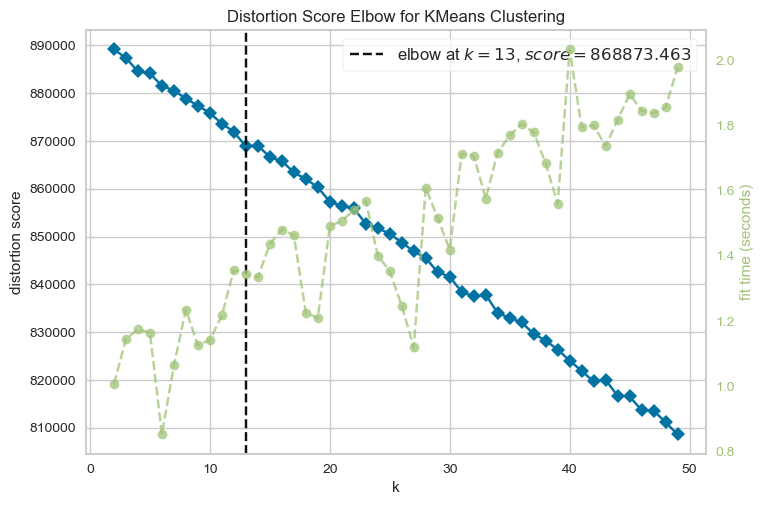

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
from yellowbrick.cluster import KElbowVisualizer
# Use the elbow method to determine the optimal number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,50))  # Adjust the range of k as needed
visualizer.fit(X_scaled)
visualizer.show()

#### The k value thats creates the most well defined elbow is approximately 13. but I will still choose K=6. As it is mentioned. This is just to show the optimum result

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)
# Apply K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)  # Change the number of clusters (n_clusters) as needed
clusters = kmeans.fit_predict(X_scaled)

C:\Users\soura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
df['Cluster'] = clusters

In [64]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Cluster
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,3
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,3
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,3
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,None,8.5,1,0,3
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,None,19.0,1,0,3


#### I'm merging the effectiveness columns into one, containing the average effectiveness for all types.

In [95]:

columns_to_remove = ['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison','against_psychic',
       'against_rock', 'against_steel', 'against_water']

# Calculate the mean value across the specified columns for each row
df['against_other_kinds'] = df[columns_to_remove].mean(axis=1)

# Drop the original columns
df = df.drop(columns=columns_to_remove)


print(df.head())


                     abilities  attack  base_happiness  base_total  \
0  ['Overgrow', 'Chlorophyll']      49              70         318   
1  ['Overgrow', 'Chlorophyll']      62              70         405   
2  ['Overgrow', 'Chlorophyll']     100              70         625   
3     ['Blaze', 'Solar Power']      52              70         309   
4     ['Blaze', 'Solar Power']      64              70         405   

  capture_rate   classfication  defense  experience_growth  height_m  hp  ...  \
0           45    Seed Pokémon       49            1059860       0.7  45  ...   
1           45    Seed Pokémon       63            1059860       1.0  60  ...   
2           45    Seed Pokémon      123            1059860       2.0  80  ...   
3           45  Lizard Pokémon       43            1059860       0.6  39  ...   
4           45   Flame Pokémon       58            1059860       1.1  58  ...   

  pokedex_number sp_attack  sp_defense  speed  type1   type2 weight_kg  \
0              1  

# A team of 6 Pokémon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokémon.

In [101]:

criteria_columns = ['attack', 'defense', 'against_other_kinds', 'sp_attack', 'sp_defense', 'speed','hp']

# Calculate the sum of criteria columns to pick the best Pokémon
df['criteria_sum'] = df[criteria_columns].sum(axis=1)

# Create an empty list to store the names of the best Pokémon from each cluster
team = []

# Iterate over each cluster and pick the Pokémon with the highest criteria_sum
for cluster_id in df['Cluster'].unique():
    best_pokemon = df[df['Cluster'] == cluster_id].sort_values(by='criteria_sum', ascending=False).head(1)
    team.append(best_pokemon['name'].values[0])

# Print the team
print(team)


['Rayquaza', 'Latias', 'Shiftry', 'Surskit', 'Armaldo', 'Pyroar']
